# Titanic Analysis

Finding the model that best predicts a Titanic passenger's survival

Data Source:
*Model-buidling: 'train.csv'
*Evaluating: 'test.csv','gender.csv'

# Step 1: Import Data

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


#Importing Data
gender=pd.read_csv('gender_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

# Step 2: Inspect Data

In [120]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [121]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [122]:
#Practice: combining two dataframe into one using PassengerID
merge_gender_test=pd.merge(left=gender,right=test,on='PassengerId')
merge_gender_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
#Checking train.csv Data to see if there are any misleading/false data
train.describe()
#No obvious false data found

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}
10        G6
21       D56
66       F33
75     F G73
123     E101
Name: Cabin, dtype: object
1      C85
3     C123
6      E46
11    C103
23      A6
Name: Cabin, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2)

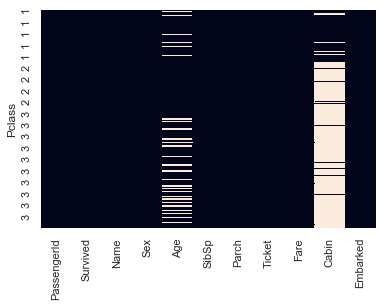

In [124]:
#Analyzing 'train' dataframe: Null Values
null_each_col={}

for col in train.columns:
    null_count=train[col].isnull().sum()
    null_each_col[col]=null_count
print(null_each_col)
#177 null values in the 'Age' column, 687 null values in the 'Cabin' column, and 2 null values in the 'Embarked' column

train_updated=train.set_index('Pclass')
train_updated=train_updated.sort_index()
sns.heatmap(train_updated.isnull(),cbar=False)
#Heat map shows that Cabin information is missing for 'Pclass' 2 and 3.

#Looking closer at Class 2 and 3's cabin values.
class23_cabin=train[train['Pclass']>=2].dropna()
print(class23_cabin['Cabin'].head())
class1_cabin=train[train['Pclass']==1].dropna()
print(class1_cabin['Cabin'].head())

#Looks like Only Cabin A,B,C,D are for Class 1 passengers. Values in 'Cabin' are nominal values
#Although room location could have a significant impact in the survival rate, I will ingore Cabin column since there are a lot missing values.
#Null values in 'Age' column will be ignored for now.

train=train.drop('Cabin',axis=1)
train.info()


In [125]:
#Analyzing 'train' dataframe: Duplicate Values
train.duplicated().sum()
#no duplicate value found

0

# Step 3: Initial Data Cleaning

In [126]:
##Data Cleaning: Name and Marital Status

#Dividing Names into First, Last, and Titles
pattern=r"\b(?P<Last>\w+),\s(?P<Title>\w+).\s(?P<First>\w+)\s*(?P<Middle>[\w+]*)\b"
extr_name=train['Name'].str.extract(pattern)

#From Title String, creating a new column "Martial Status"
extr_name['Marital Status']='N/A'
for index in extr_name.index:
    if extr_name['Title'][index]=='Mr'or extr_name['Title'][index]=='Mrs':
        extr_name['Marital Status'][index]='Married'
    else:
        extr_name['Marital Status'][index]='Unmarried'

        
        
#Joining two tables together
train_updated=pd.concat([train,extr_name],axis=1)
train_updated.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last,Title,First,Middle,Marital Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris,Married
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley,Married
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,,Unmarried
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath,Married
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry,Married
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Moran,Mr,James,,Married
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,McCarthy,Mr,Timothy,J,Married
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Palsson,Master,Gosta,Leonard,Unmarried
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Johnson,Mrs,Oscar,W,Married
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Nasser,Mrs,Nicholas,,Married


# Step 4: Data Visualization

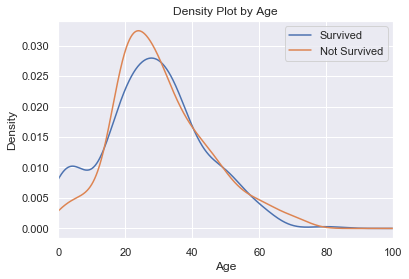

In [127]:
#Survival Rate By Age: Kernel Density Plot

train_updated[train_updated.Survived==1]['Age'].plot.kde(label='Survived',legend=True)
train_updated[train_updated.Survived==0]['Age'].plot.kde(label='Not Survived',legend=True,xlim=(0,100),title='Density Plot by Age')
plt.xlabel('Age')
plt.show()
#The largest difference between survivde and not survided group found in younger ages (lower than 40)
#However, density plot is not the best method to view the difference between survived and not survived groups.

Text(0.5, 0, 'Age Group')

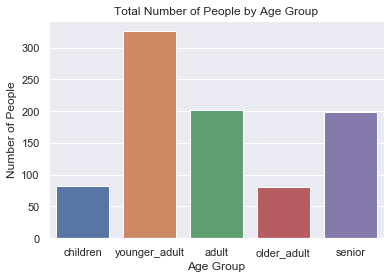

In [128]:
#Survial Rate by Age: Grouped Bar Plots

#first converting nominal data into ordinal data (children(0-15),young_adult(15-30),adult(30-45),older_adult(45-60),seniors(60+))
def make_age_ordinal(row):
    if row['Age'] <= 15:
        return 'children'
    if (15 < row['Age'] <= 30):
        return 'younger_adult'
    if (30 < row['Age'] <=  45):
        return 'adult'
    if (45 < row['Age'] <= 60):
        return 'older_adult'
    else:
        return 'senior'

train_updated['Age_ordinal']=train_updated.apply(make_age_ordinal,axis=1)

train_updated.head()
sns.set(style="darkgrid")
#creating a box plot to check if there are enough data for each age group
sns.countplot(x='Age_ordinal',data=train_updated,order=['children','younger_adult','adult','older_adult','senior'])
plt.title('Total Number of People by Age Group')
plt.ylabel('Number of People')
plt.xlabel('Age Group')

#The bar plot shows that 'younger_adult' group has the largest count.  All groups have relatively high numbers of data points

{'Age Group': Index(['younger_adult', 'adult', 'senior', 'children', 'older_adult'], dtype='object'), 'Survival Rate': younger_adult    0.358896
adult            0.425743
senior           0.286432
children         0.590361
older_adult      0.407407
Name: Age_ordinal, dtype: float64}


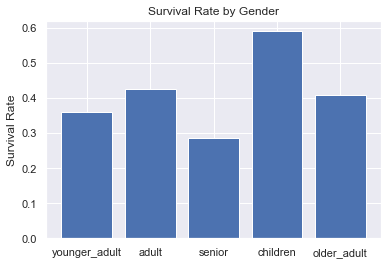

In [129]:
#Creating bar chart: survival rate by the age group

count_train_age=train_updated['Age_ordinal'].value_counts()
train_age_surv=train_updated[train_updated['Survived']==1]['Age_ordinal'].value_counts()

survival_rate_age=train_age_surv/count_train_age
xtick_name_arr=['children','younger_adult']
xtick_name=['Children','Younger Adult','Adult','Older Adult','Senior']

#creating a dataframe of survival rates of different age groups
df_survival_rate_age={}
df_survival_rate_age['Age Group']=survival_rate_age.index
df_survival_rate_age['Survival Rate']=survival_rate_age
print(df_survival_rate_age)

#box chart
plt.bar(range(len(df_survival_rate_age['Age Group'])),df_survival_rate_age['Survival Rate'])
plt.xticks(range(len(df_survival_rate_age['Age Group'])),df_survival_rate_age['Age Group'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()



#Bar chart shows that the survival rate is highest for children (age:0~15) and lowest for seniors (age:60+)

1    233
0     81
Name: Survived, dtype: int64
0.25796178343949044
0    468
1    109
Name: Survived, dtype: int64
0.18890814558058924
       male    female
0  0.188908  0.257962


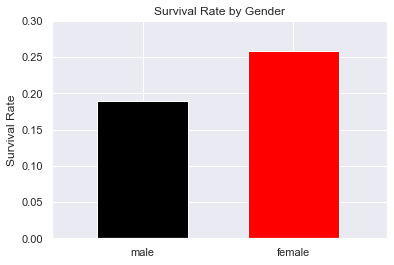

In [130]:
#Survival Rate by Gender
female_survive=train_updated[train_updated['Sex']=='female']['Survived'].value_counts()
female_survival_rate=female_survive[0]/female_survive.sum()
print(female_survive)
print(female_survival_rate)
male_survive=train_updated[train_updated['Sex']=='male']['Survived'].value_counts()
male_survival_rate=male_survive[1]/male_survive.sum()
print(male_survive)
print(male_survival_rate)

#females' survival rate is about 7 percent higher than that of male

#Visualizing Gender Difference:
# gen_surv_rate={'gender':['male','female'],'survival_rate':[male_survival_rate,female_survival_rate]}
gen_surv_rate={'male':[male_survival_rate],'female':[female_survival_rate]}
df_gen_surv_rate=pd.DataFrame(data=gen_surv_rate)
print(df_gen_surv_rate)
#creating a bar plot
fig,ax=plt.subplots()
bar_positions=arange(2)/6
ax.bar(bar_positions,df_gen_surv_rate.iloc[0,:],0.1,color=['black','red'])
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_gen_surv_rate.columns)
ax.set_xlim(-0.1,0.27)
ax.set_ylim(0,0.3)

plt.tick_params(axis='both', which='both',bottom=False,left=False) 
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

{'Class': Int64Index([1, 2, 3], dtype='int64'), 'Survival Rate': 1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64}


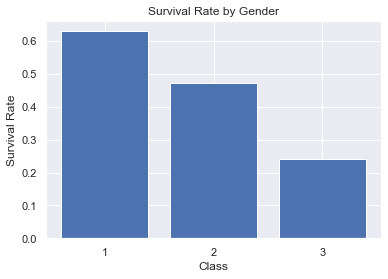

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


In [131]:
#survival rate by class

train_updated['Pclass'].value_counts()



count_train_class=train_updated['Pclass'].value_counts()
train_class_surv=train_updated[train_updated['Survived']==1]['Pclass'].value_counts()

survival_rate_class=train_class_surv/count_train_class
xtick_name=['Class 1','Class 2','Class 3']


df_survival_rate_class={}


df_survival_rate_class['Class']=survival_rate_class.index
df_survival_rate_class['Survival Rate']=survival_rate_class
print(df_survival_rate_class)


plt.bar(range(len(df_survival_rate_class['Class'])),df_survival_rate_class['Survival Rate'])
plt.xticks(range(len(df_survival_rate_class['Class'])),df_survival_rate_class['Class'])
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.title('Survival Rate by Gender')
plt.show()

print(survival_rate_class)

#The bar chart shows that higher class passengers have a significantly higher survival rate than those who are lower.
#This might be due to their room locations.

# Data Cleaning Continued

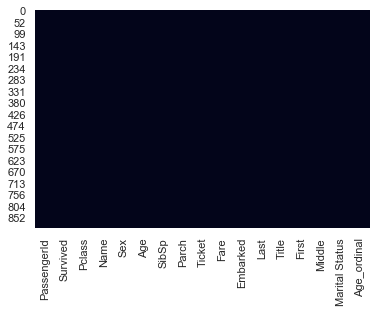

In [132]:
#Cleaning Data for Modeling

#Drop Null Rows in both 'embarked' and 'age' columns. Another option is to add median,mean value into them.
#'PassengerID' and 

train_updated=train_updated.dropna(axis=0)
sns.heatmap(train_updated.isnull(),cbar=False)
#print(train_updated.isnull().sum())

#All null values omitted

In [133]:
#Checking test.csv to see if there any null values.
print(merge_gender_test.isnull().sum())

#Since there are some null values in Age and Cabin columns, rows will be dropped.
merge_gender_test=merge_gender_test.dropna(axis=0)
print(merge_gender_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Step 5: Normalization

In [134]:
#Before data could be used for modeling, data is normalized
#Age,SibSp,Parch,Fare columns will be normalized

train_nor=train_updated[['Age','SibSp','Parch','Fare']]
train_nor=(train_nor-train_nor.mean())/(train_nor.std())
train_nor['Survived']=train_updated['Survived']

test_nor=merge_gender_test[['Age','SibSp','Parch','Fare']]
test_nor=(test_nor-test_nor.mean())/(test_nor.std())
test_nor['Survived']=merge_gender_test['Survived']

# Step 6: KNN Modeling

In [144]:
features = train_nor.columns.tolist()
features.remove('Survived')

knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_nor[features], train_nor['Survived'])
predictions = knn.predict(test_nor[features])

mse=mean_squared_error(test_nor['Survived'],predictions)
rmse=mse**(1/2)

print(mse)
print(rmse)
print(predictions)
a=predictions-test_nor['Survived']
print(abs(a).mean())

#Average difference between the prediction and the actual survival rate is 0.43, which is fairly large.
#This data show

0.28229885057471266
0.5313180314789935
[0.8 0.2 0.8 0.8 0.  0.2 0.2 0.  0.8 0.6 0.  0.6 0.8 0.6 0.2 0.2 0.  1.
 0.8 0.4 0.8 0.4 0.6 0.  0.8 0.6 0.8 1.  0.4 0.2 0.  0.6 0.8 0.6 0.2 0.
 0.2 1.  0.  0.2 0.8 0.8 1.  1.  0.4 0.4 0.8 0.8 0.2 0.2 0.6 0.8 0.  0.8
 0.8 0.8 0.6 0.4 0.4 0.6 0.6 0.  0.8 0.6 0.2 0.4 0.2 0.  0.8 0.2 0.  0.6
 0.4 0.8 0.  0.4 0.2 0.4 0.2 0.8 0.4 0.4 0.  0.8 0.8 0.8 0.4]
0.432183908045977
12    -0.2
14    -0.8
24    -0.2
26    -0.2
28     0.0
      ... 
404    0.0
405    0.8
407    0.8
411   -0.2
414   -0.6
Name: Survived, Length: 87, dtype: float64
